In [ ]:
from lenet_arch import LeNet
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import load_model
import numpy as np

In [ ]:
# grab the MNIST dataset
print("[INFO] accessing MNIST...")
dataset = fetch_openml('mnist_784')
data = dataset.data
print("done")

[INFO] accessing MNIST...
done


In [ ]:
# scale the input data to the range [0, 1] and perform a train/test split
(trainX, testX, trainY, testY) = train_test_split(data / 255.0,
                                                  dataset.target.astype("int"), test_size=0.25, random_state=42)


If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated 
and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result 
would be the same .i.e, same values in train and test datasets.

In [ ]:
'''
# if we are using "channels first" ordering, then reshape the design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    data = data.reshape(data.shape[0], 1, 28, 28)

# otherwise, we are using "channels last" ordering ( Which is default in Tensorflow Backend !), so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    data = data.values.reshape(data.shape[0], 28, 28, 1)

'''

In [ ]:
if K.image_data_format() == 'channels_first':
  trainX = trainX.values.reshape(trainX.shape[0], 1, 28,28)
  testX = testX.values.reshape(trainX.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  trainX = trainX.values.reshape(trainX.shape[0],28, 28, 1)
  testX = testX.values.reshape(testX.shape[0],28, 28, 1)
  input_shape = (28, 28, 1)

    
trainX = trainX.astype('float32')
testX = testX.astype('float32') 

In [ ]:
# convert the labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [ ]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, fill_mode="nearest")

In [ ]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# train the network
No_of_epoch = 50
print("[INFO] training network...")
# H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=No_of_epoch, verbose=1)

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=32),
validation_data=(testX, testY), steps_per_epoch=len(trainX) // 32,
epochs=No_of_epoch, verbose=1)

[INFO] training network...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
1640/1640 [==============================] - 142s 86ms/step - loss: 0.9642 - accuracy: 0.6873 - val_loss: 0.1618 - val_accuracy: 0.9540
Epoch 2/50
1640/1640 [==============================] - 139s 85ms/step - loss: 0.2885 - accuracy: 0.9120 - val_loss: 0.1055 - val_accuracy: 0.9671
Epoch 3/50
1640/1640 [==============================] - 137s 83ms/step - loss: 0.2065 - accuracy: 0.9372 - val_loss: 0.0829 - val_accuracy: 0.9723
Epoch 4/50
1640/1640 [==============================] - 134s 82ms/step - loss: 0.1656 - accuracy: 0.9500 - val_loss: 0.0757 - val_accuracy: 0.9766
Epoch 5/50
1640/1640 [==============================] - 136s 83ms/step - loss: 0.1421 - accuracy: 0.9555 - val_loss: 0.0651 - val_accuracy: 0.9783
Epoch 6/50
1640/1640 [==============================] - 135s 82ms/step - loss: 0.1256 - accuracy: 0.9608 - val_loss: 0.0589 - val_accuracy: 0.9818
Epoch 7/50
1640/1640 [==============================] - 135s 82ms/step - loss: 0.1124 - accuracy: 0.9647 - val_loss: 0

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1),
                            target_names=[str(x) for x in le.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1714
           1       1.00      1.00      1.00      1977
           2       0.99      1.00      0.99      1761
           3       0.99      1.00      1.00      1806
           4       0.99      0.99      0.99      1587
           5       1.00      0.99      0.99      1607
           6       0.99      1.00      0.99      1761
           7       0.99      0.99      0.99      1878
           8       0.99      0.99      0.99      1657
           9       0.99      0.99      0.99      1752

    accuracy                           0.99     17500
   macro avg       0.99      0.99      0.99     17500
weighted avg       0.99      0.99      0.99     17500



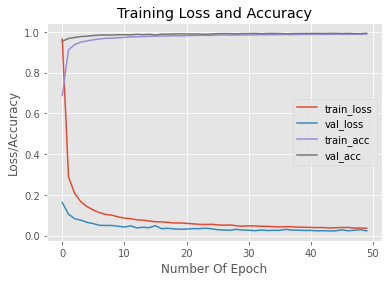

In [ ]:
%matplotlib inline
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, No_of_epoch), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, No_of_epoch), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, No_of_epoch), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, No_of_epoch), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Number Of Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
cd /content/drive/MyDrive/MNIST_digit_classification/LeNet MNIST models

/content/drive/MyDrive/MNIST_digit_classification/LeNet MNIST models


In [ ]:
model.save("modelofMNISTwithLeNet-2.hdf5")
print("Done Saving")


Done Saving


In [ ]:
print(testX.shape)

(17500, 28, 28, 1)
